In [1]:
# Import required packages
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from io import StringIO
import requests
import json
import pandas as pd
%matplotlib inline

In [2]:
# Methods for read and write file through GET and PUT methods of HTTP
def get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_c31eef4c6875a326d7c2cb16984a5e02d9dace51','domain': {'id': 'e4c3685617404e40b0afb0d280e5d678'},
            'password': 'b31qd?[3APH3&].5'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)

def put_object_storage_file_with_credentials_a860223228054eadb78455bad5266913(container, filename):  
    
    f = open(filename,'r')
    file_data = f.read()
    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_c31eef4c6875a326d7c2cb16984a5e02d9dace51','domain': {'id': 'e4c3685617404e40b0afb0d280e5d678'},
            'password': 'b31qd?[3APH3&].5'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.put(url=url2, headers=headers2, data = file_data )
    print resp2

In [3]:
# Read prove dataset
df_data_1 = pd.read_csv(get_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'prove.csv'), sep=";")
df_data_11 = df_data_1.copy()
df_data_1["Disco"] = df_data_1["Disco"].astype("category")
cat_columns = df_data_1.select_dtypes(["category"]).columns
df_data_1[cat_columns] = df_data_1[cat_columns].apply(lambda x: x.cat.codes)
df_data_1.head()

,Material,Usura_mat_mm,Usura_mat_g,Usura_disco_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,...,Vmax,Rendimento,Indice_misura,Attrezzatura,Raggio_ruota,Area_pistone,CodImpianto,Raggio_medio,Disco_nuovo,Disco
0,9482,0.55,6.7,8.0,164,1,166,167,753,768,...,190,1,2,0,308,22.9,0,117.7,0,4
1,9799,0.54,9.7,5.0,169,1,194,184,740,742,...,195,1,2,0,308,22.9,1,118.0,0,3
2,16136,0.50,8.9,5.0,196,1,196,194,768,743,...,195,1,2,0,308,22.9,2,104.0,0,0
3,19269,0.36,7.9,6.0,194,1,194,190,0,0,...,195,1,2,0,308,22.9,2,104.0,0,0
4,19269,0.58,8.8,5.4,190,1,213,195,0,0,...,190,1,1,0,308,22.9,3,117.7,0,4


In [4]:
# Print some statistical data about the prove dataset
df_data_1.describe()

,Material,Usura_mat_mm,Usura_mat_g,Usura_disco_g,Durezza_Disco,CodPinza,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,...,Vmax,Rendimento,Indice_misura,Attrezzatura,Raggio_ruota,Area_pistone,CodImpianto,Raggio_medio,Disco_nuovo,Disco
count,653.000000,653.00000,653.000000,653.000000,653.000000,653.000000,653.000000,650.000000,653.000000,653.000000,...,653.000000,653,653.000000,653.000000,653.000000,653.000000,652.000000,653.000000,653.000000,653.000000
mean,20668.571210,1.05611,13.232006,7.838285,198.894334,1.217458,175.343032,175.313846,208.984686,208.453292,...,191.012251,1,1.986217,0.001531,307.623277,22.996294,5.881902,110.135375,0.009188,2.225115
std,6272.771726,0.70927,7.996596,8.604602,25.954825,1.284118,43.668705,44.198669,328.141602,327.358947,...,5.431941,0,0.116677,0.039133,2.873970,0.493346,3.900039,6.761052,0.095488,1.410906
min,8951.000000,0.21000,5.600000,-0.100000,146.000000,0.000000,37.000000,36.000000,0.000000,0.000000,...,169.000000,1,1.000000,0.000000,290.000000,22.900000,0.000000,104.000000,0.000000,0.000000
25%,15761.000000,0.64000,8.600000,4.700000,180.000000,0.000000,147.000000,146.000000,0.000000,0.000000,...,185.000000,1,2.000000,0.000000,308.000000,22.900000,1.000000,104.000000,0.000000,1.000000
50%,23292.000000,0.91000,11.000000,7.000000,194.000000,1.000000,173.000000,173.000000,0.000000,0.000000,...,190.000000,1,2.000000,0.000000,308.000000,22.900000,7.000000,104.000000,0.000000,1.000000
75%,25291.000000,1.18000,14.700000,10.000000,213.000000,1.000000,198.000000,197.000000,623.000000,625.000000,...,195.000000,1,2.000000,0.000000,308.000000,22.900000,8.000000,117.700000,0.000000,4.000000
max,29526.000000,8.69000,101.800000,194.700000,305.000000,4.000000,481.000000,489.000000,930.000000,867.000000,...,215.000000,1,2.000000,1.000000,315.000000,25.520000,15.000000,118.000000,1.000000,4.000000


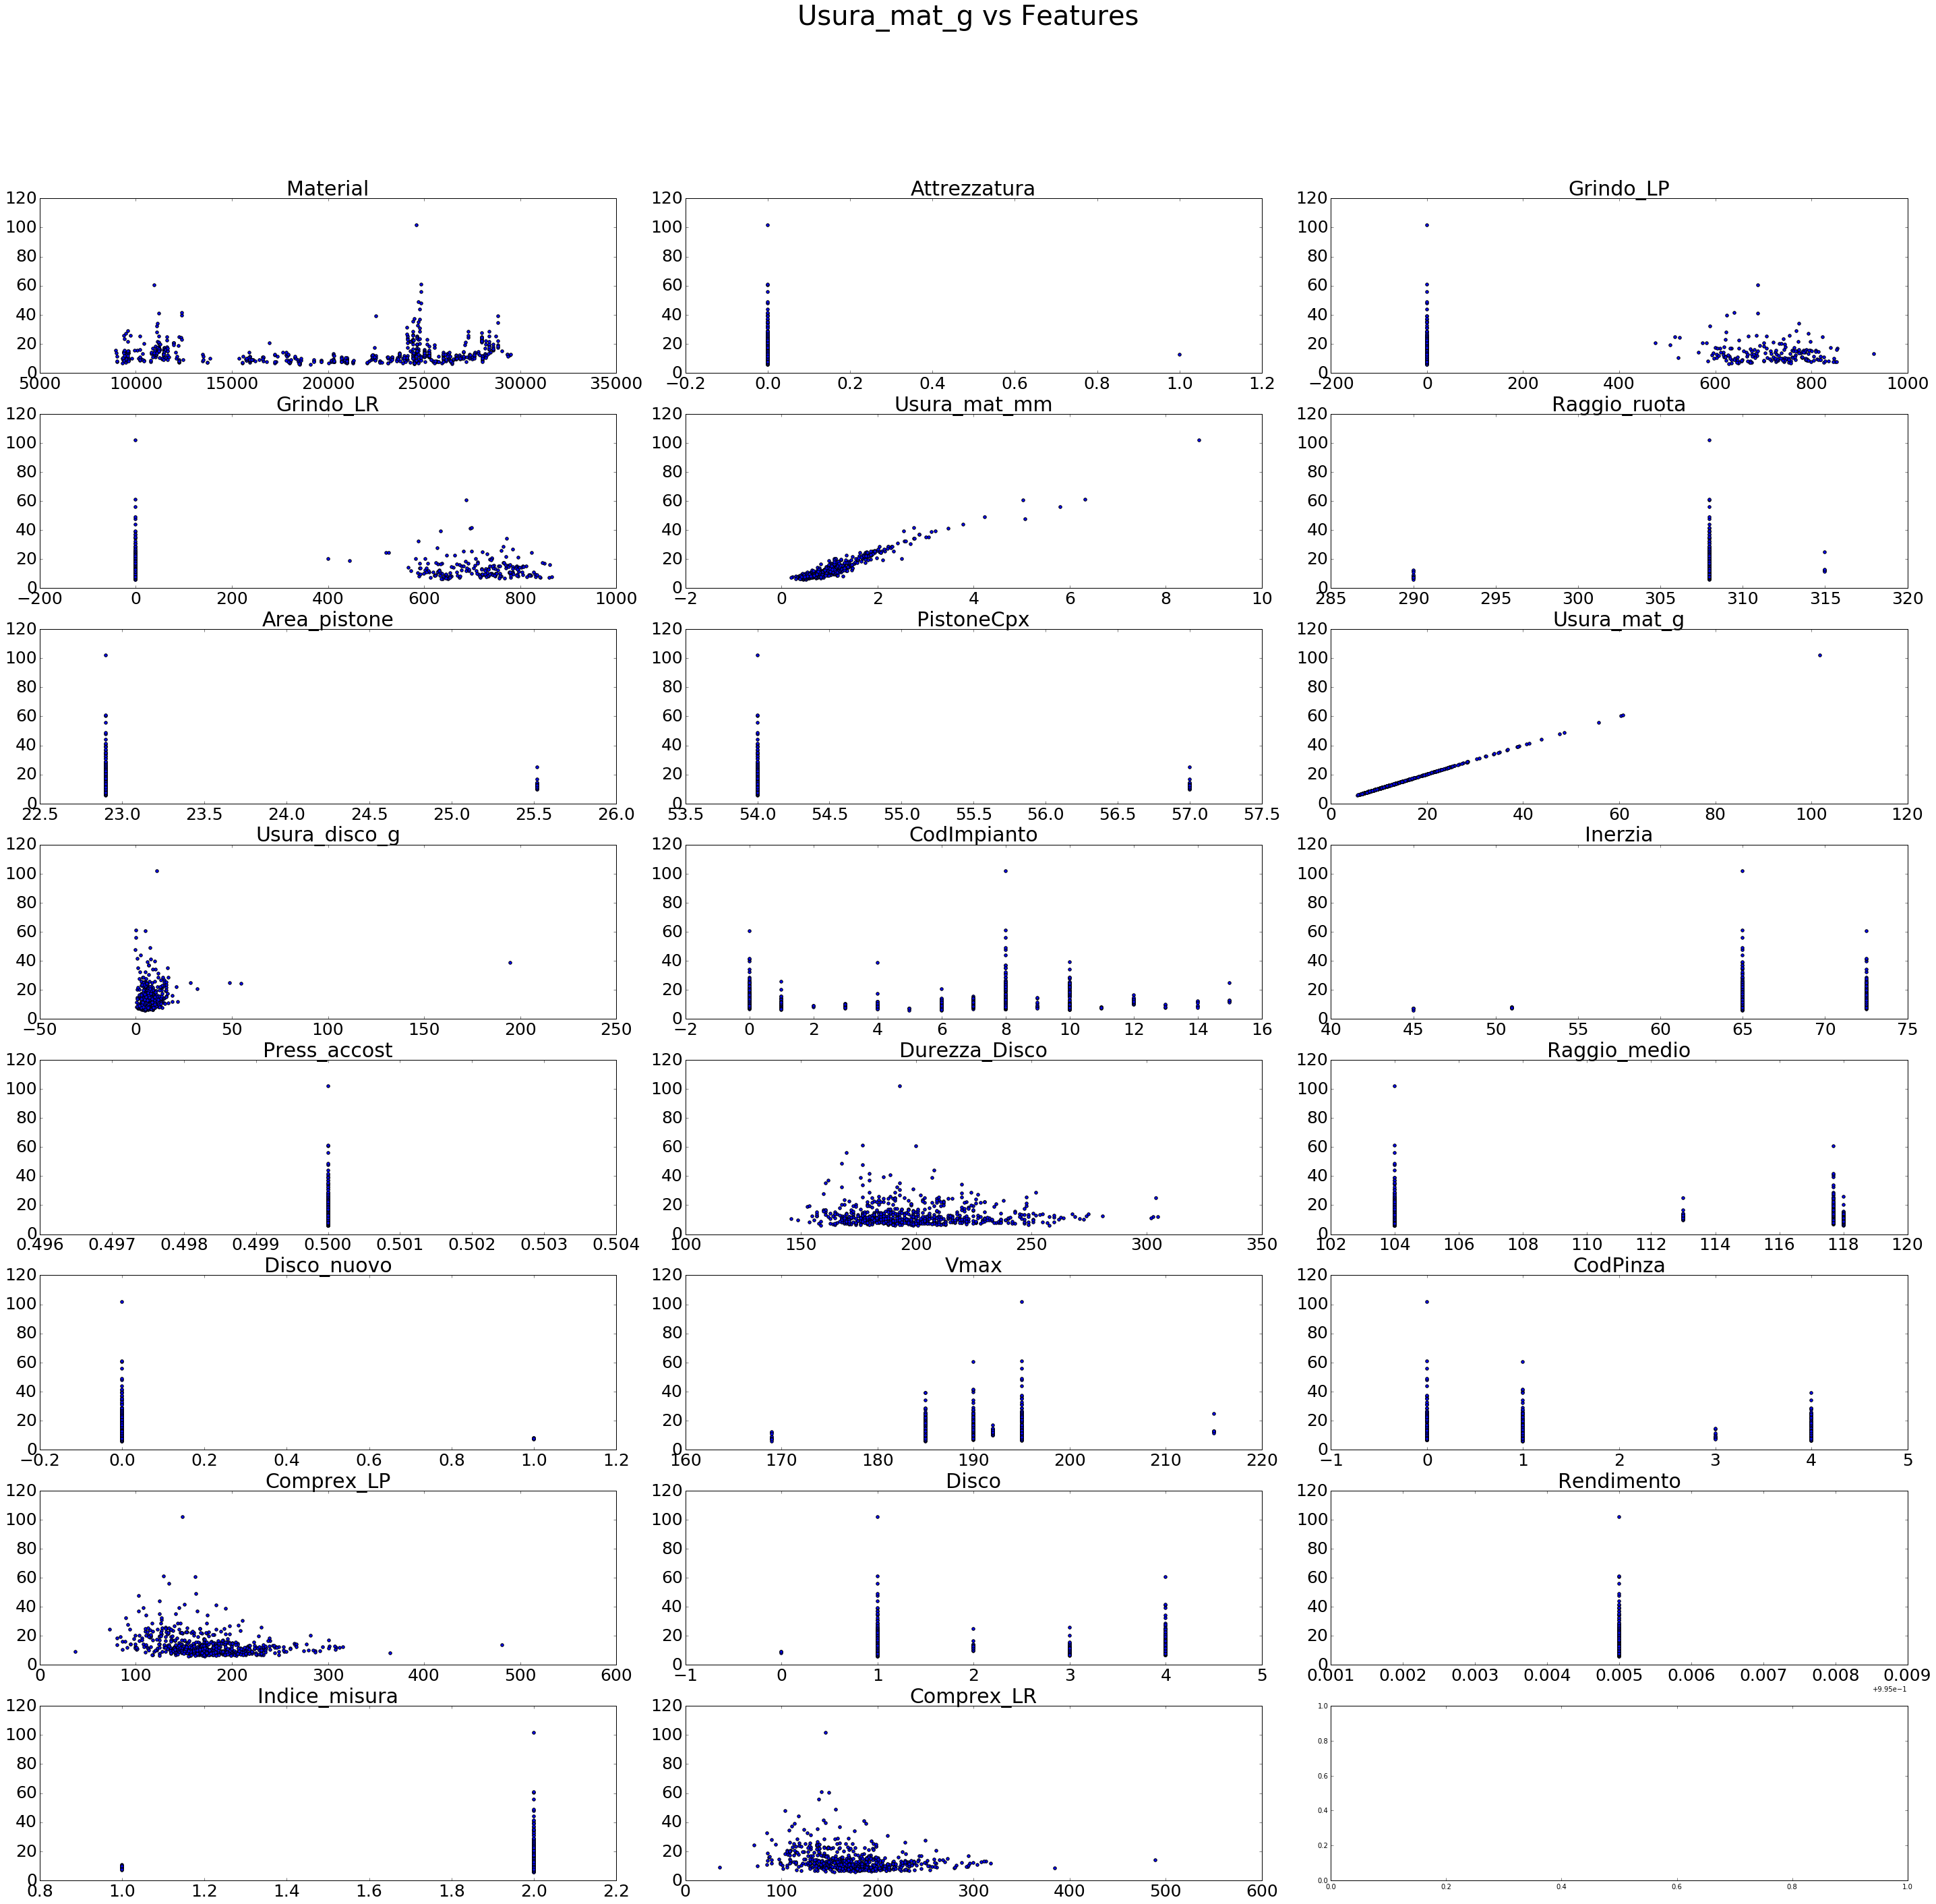

In [13]:
# Plot distribution of the target value (Usura_mat_g) with respect to the features
fig, axarr = plt.subplots(8, 3,figsize=(40, 40))
fig.suptitle("Usura_mat_g vs Features", fontsize=40)

for index,col in enumerate(df_data_1.columns):
    i = index%8
    j = index%3
    axarr[i,j].scatter(df_data_1[col], df_data_1['Usura_mat_g'])
    axarr[i,j].set_title(col, size=30)
    axarr[i,j].tick_params(labelsize=25)
    
fig.tight_layout()
fig.subplots_adjust(top=0.88)

plt.show()

In [6]:
# Drop noisy/useless features
df_data_11 = df_data_11.drop("Usura_mat_mm",1)
df_data_11 = df_data_11.drop("Usura_disco_g",1)
df_data_11 = df_data_11.drop("Attrezzatura",1)
df_data_11 = df_data_11.drop("Raggio_ruota",1)
df_data_11 = df_data_11.drop("Disco_nuovo",1)
df_data_11 = df_data_11.drop("Press_accost",1)
df_data_11 = df_data_11.drop("Indice_misura",1)
df_data_11 = df_data_11.drop("Rendimento",1)

In [7]:
# Binarize discrete features
df_data_2 = pd.get_dummies(df_data_11, columns=["CodPinza","CodImpianto","Disco", "Vmax", "Area_pistone",
                                                "PistoneCpx", "Inerzia", "Raggio_medio"])

In [8]:
print "Data-dimension as loaded: " + str(df_data_1.shape)
print "Data-dimension after drop: " + str(df_data_11.shape)
print "Data-dimension OHE: " + str(df_data_2.shape)

Data-dimension as loaded: (653, 23)
Data-dimension after drop: (653, 15)
Data-dimension OHE: (653, 50)


In [9]:
df_data_2.head()

,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,CodPinza_0,CodPinza_1,CodPinza_3,...,PistoneCpx_54,PistoneCpx_57,Inerzia_45.0,Inerzia_51.0,Inerzia_65.0,Inerzia_72.5,Raggio_medio_104.0,Raggio_medio_113.0,Raggio_medio_117.7,Raggio_medio_118.0
0,9482,6.7,164,166,167,753,768,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,9799,9.7,169,194,184,740,742,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2,16136,8.9,196,196,194,768,743,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3,19269,7.9,194,194,190,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
4,19269,8.8,190,213,195,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [10]:
# Add material ID as index of the DataFrame
df_data_2 = df_data_2.set_index(['Material'], drop=False)
df_data_2.index.name = None
print df_data_2.shape
df_data_2.head()

(653, 50)


,Material,Usura_mat_g,Durezza_Disco,Comprex_LP,Comprex_LR,Grindo_LP,Grindo_LR,CodPinza_0,CodPinza_1,CodPinza_3,...,PistoneCpx_54,PistoneCpx_57,Inerzia_45.0,Inerzia_51.0,Inerzia_65.0,Inerzia_72.5,Raggio_medio_104.0,Raggio_medio_113.0,Raggio_medio_117.7,Raggio_medio_118.0
9482,9482,6.7,164,166,167,753,768,0,1,0,...,1,0,0,0,0,1,0,0,1,0
9799,9799,9.7,169,194,184,740,742,0,1,0,...,1,0,0,0,1,0,0,0,0,1
16136,16136,8.9,196,196,194,768,743,0,1,0,...,1,0,0,0,1,0,1,0,0,0
19269,19269,7.9,194,194,190,0,0,0,1,0,...,1,0,0,0,1,0,1,0,0,0
19269,19269,8.8,190,213,195,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0


In [11]:
# Store cleaned dataset
df_data_2.to_csv('cleaned_prove.csv', index=True)

In [12]:
# PUT request to store file
put_object_storage_file_with_credentials_a860223228054eadb78455bad5266913('ITTProject', 'cleaned_prove.csv')

<Response [201]>
